SVM Intuition: Use a linear model to try and find a linear decision boundary (hyperplane) that best separates the data. Choose hyperplane that yields highest separation between both classes, or where edge datapoints distance to decision boundary are maximized. The formula can be visualized as follows:

w * x_i - b >= 1 if y_i = 1
w * x_i - b <= -1 if y_i = -1

y_i(w * x_i - b) >= 1

Loss Function: Hinge Loss:

L = max(0, 1 - y_i(w * x_i - b)) for ith iteration

L = {0, if y * f(x) >= 1
    {1 - y * f(x), otherwise


SVM classification accuracy 1.0


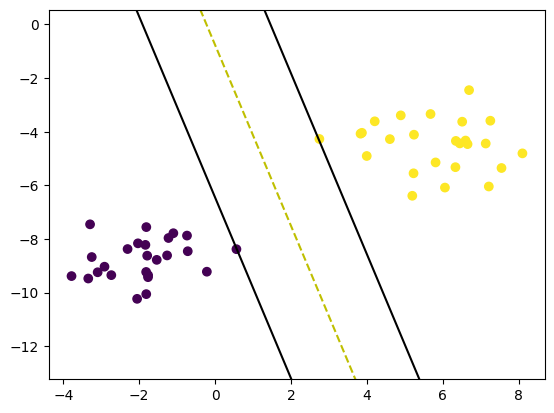

In [ ]:
import numpy as np

class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        # init weights
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("SVM classification accuracy", accuracy(y_test, predictions))

def visualize_svm():
      def get_hyperplane_value(x, w, b, offset):
          return (-w[0] * x + b + offset) / w[1]

      fig = plt.figure()
      ax = fig.add_subplot(1, 1, 1)
      plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

      x0_1 = np.amin(X[:, 0])
      x0_2 = np.amax(X[:, 0])

      x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
      x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

      x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
      x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

      x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
      x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

      ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
      ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
      ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

      x1_min = np.amin(X[:, 1])
      x1_max = np.amax(X[:, 1])
      ax.set_ylim([x1_min - 3, x1_max + 3])

      plt.show()

visualize_svm()


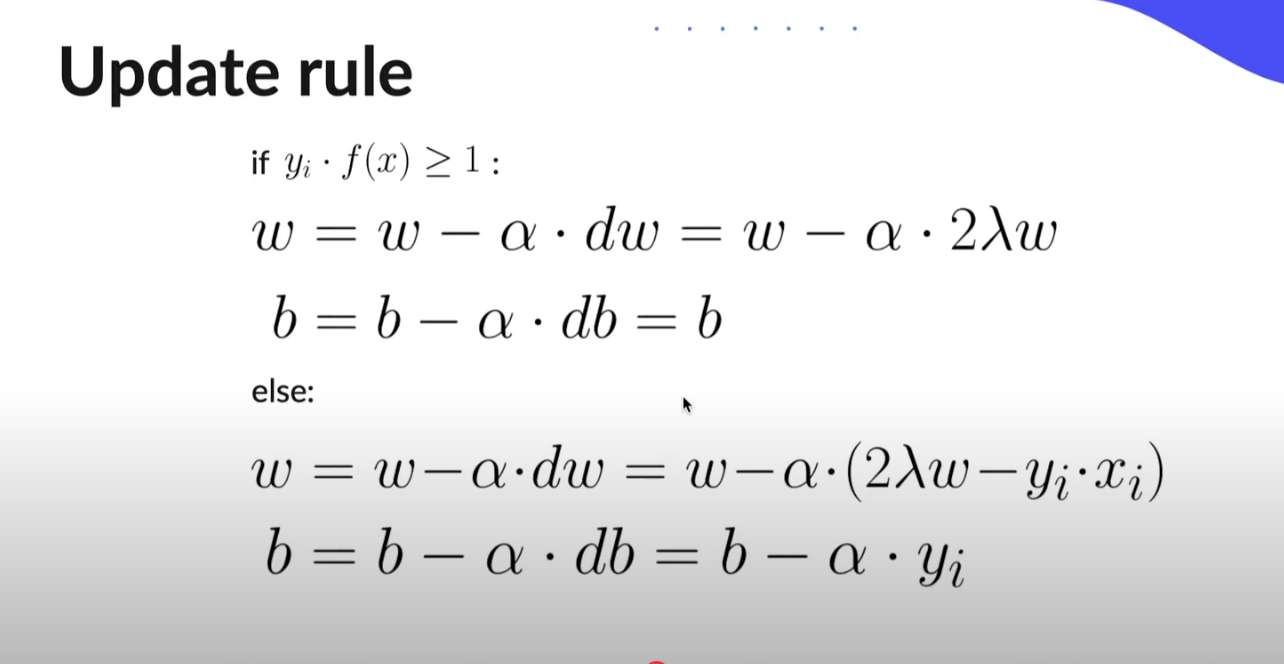

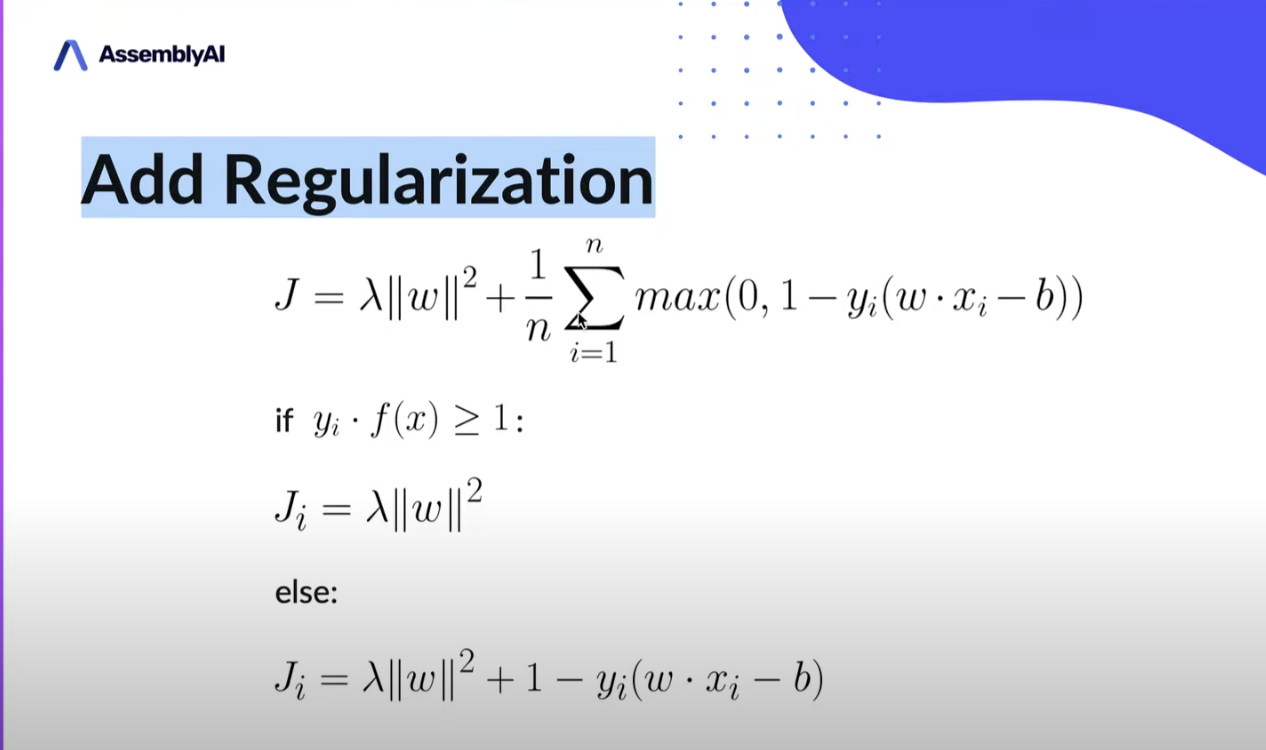